<a href="https://colab.research.google.com/github/diogenesjusto/FIAP/blob/master/SHIFT/desafio/baba/predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import sklearn.linear_model as LM
import sklearn.ensemble as E
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from datetime import datetime
from pycaret.regression import *
import numpy as np

In [2]:
df = pd.read_csv("BABA.csv", )
df.drop(columns=['Y', 'X'], inplace=True)
df

,date,mes,weekday,margem,venda,desconto,outdesc,outmg
0,20140801,agosto,sexta-feira,0.406111,110042.460,9190.907534,0,0
1,20140802,agosto,sabado,0.416022,58377.320,5713.043012,0,0
2,20140803,agosto,domingo,0.431993,64635.390,8621.708915,0,0
3,20140804,agosto,segunda-feira,0.409216,140417.321,18312.965640,0,0
4,20140805,agosto,terca-feira,0.449648,149700.286,19942.741300,0,0
...,...,...,...,...,...,...,...,...
391,20150827,agosto,quinta-feira,0.451562,NaN,5846.133551,0,0
392,20150828,agosto,sexta-feira,0.472608,NaN,2657.847261,0,0
393,20150829,agosto,sabado,0.385612,NaN,269.530000,0,0
394,20150830,agosto,domingo,0.495615,NaN,3434.838118,0,0


In [3]:
df.index = pd.to_datetime(df['date'], format='%Y%m%d')
df.drop(columns=['date'], inplace=True)
df

,mes,weekday,margem,venda,desconto,outdesc,outmg
date,,,,,,,
2014-08-01,agosto,sexta-feira,0.406111,110042.460,9190.907534,0,0
2014-08-02,agosto,sabado,0.416022,58377.320,5713.043012,0,0
2014-08-03,agosto,domingo,0.431993,64635.390,8621.708915,0,0
2014-08-04,agosto,segunda-feira,0.409216,140417.321,18312.965640,0,0
2014-08-05,agosto,terca-feira,0.449648,149700.286,19942.741300,0,0
...,...,...,...,...,...,...,...
2015-08-27,agosto,quinta-feira,0.451562,NaN,5846.133551,0,0
2015-08-28,agosto,sexta-feira,0.472608,NaN,2657.847261,0,0
2015-08-29,agosto,sabado,0.385612,NaN,269.530000,0,0


In [4]:
df2 = pd.read_csv("dollar.csv", sep=';')
df2.index = pd.to_datetime(df2['date'], format='%Y-%m-%d')
df['DOLLAR'] = df2['DOLLAR']
df['DOLLAR'].fillna(method='ffill', inplace=True)
df

,mes,weekday,margem,venda,desconto,outdesc,outmg,DOLLAR
date,,,,,,,,
2014-08-01,agosto,sexta-feira,0.406111,110042.460,9190.907534,0,0,2.2603
2014-08-02,agosto,sabado,0.416022,58377.320,5713.043012,0,0,2.2603
2014-08-03,agosto,domingo,0.431993,64635.390,8621.708915,0,0,2.2603
2014-08-04,agosto,segunda-feira,0.409216,140417.321,18312.965640,0,0,2.2523
2014-08-05,agosto,terca-feira,0.449648,149700.286,19942.741300,0,0,2.2540
...,...,...,...,...,...,...,...,...
2015-08-27,agosto,quinta-feira,0.451562,NaN,5846.133551,0,0,3.5941
2015-08-28,agosto,sexta-feira,0.472608,NaN,2657.847261,0,0,3.5502
2015-08-29,agosto,sabado,0.385612,NaN,269.530000,0,0,3.5502


<Axes: xlabel='date'>

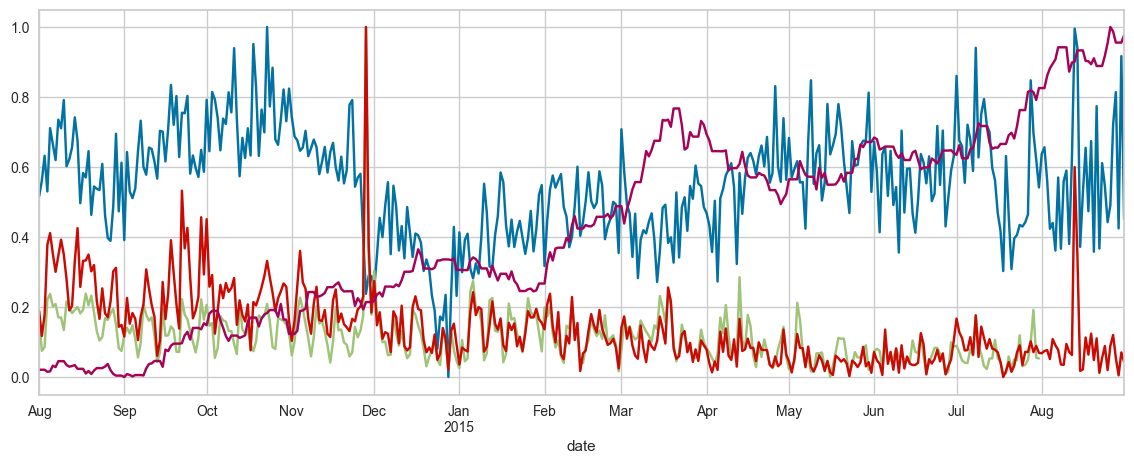

In [5]:
scaler = MinMaxScaler(feature_range=(0,1)) # muito útil na hora de construir scores para valores | Ex: quando quero classificar clientes criando scores entre eles
df['_margem'], df['_venda'], df['_desconto'], df['_DOLLAR'] = scaler.fit_transform(df[['margem']]), scaler.fit_transform(df[['venda']]), scaler.fit_transform(df[['desconto']]), scaler.fit_transform(df[['DOLLAR']])
df[['_margem', '_venda', '_desconto', '_DOLLAR']].plot(figsize=(14,5))

In [6]:
df.corr()

,margem,venda,desconto,outdesc,outmg,DOLLAR,_margem,_venda,_desconto,_DOLLAR
margem,1.000000,-0.087768,0.264945,0.061757,-0.234386,-0.097921,1.000000,-0.087768,0.264945,-0.097921
venda,-0.087768,1.000000,0.799616,0.483898,-0.077013,-0.385052,-0.087768,1.000000,0.799616,-0.385052
desconto,0.264945,0.799616,1.000000,0.467836,-0.069002,-0.593596,0.264945,0.799616,1.000000,-0.593596
outdesc,0.061757,0.483898,0.467836,1.000000,-0.006225,-0.007718,0.061757,0.483898,0.467836,-0.007718
outmg,-0.234386,-0.077013,-0.069002,-0.006225,1.000000,-0.024677,-0.234386,-0.077013,-0.069002,-0.024677
DOLLAR,-0.097921,-0.385052,-0.593596,-0.007718,-0.024677,1.000000,-0.097921,-0.385052,-0.593596,1.000000
_margem,1.000000,-0.087768,0.264945,0.061757,-0.234386,-0.097921,1.000000,-0.087768,0.264945,-0.097921
_venda,-0.087768,1.000000,0.799616,0.483898,-0.077013,-0.385052,-0.087768,1.000000,0.799616,-0.385052
_desconto,0.264945,0.799616,1.000000,0.467836,-0.069002,-0.593596,0.264945,0.799616,1.000000,-0.593596
_DOLLAR,-0.097921,-0.385052,-0.593596,-0.007718,-0.024677,1.000000,-0.097921,-0.385052,-0.593596,1.000000


In [7]:
#df = df.drop(df[df['mes'] == 'novembro'].index)

In [8]:
# Função para atribuir o valor 1 se maior que 200, caso contrário, 0
def atribuir_valor(valor):
    if valor > 200000:
        return 1
    else:
        return 0
# Criar a nova coluna com base na função atribuir_valor
df['outvenda'] = df['venda'].apply(atribuir_valor)

In [9]:
# Função para atribuir o valor 1 se maior que 200, caso contrário, 0
def atribuir_valor(valor):
    if valor == 'sabado' or valor == 'domingo':
        return 1
    else:
        return 0
# Criar a nova coluna com base na função atribuir_valor
df['fds'] = df['weekday'].apply(atribuir_valor)

In [10]:
# Função para atribuir o valor 1 se maior que 200, caso contrário, 0
def atribuir_valor(valor):
    if valor == 'segunda-feira':
        return 1
    else:
        return 0
# Criar a nova coluna com base na função atribuir_valor
df['segunda'] = df['weekday'].apply(atribuir_valor)

In [11]:
#df[df['segunda-feira'] == 1]

In [12]:
df.corr()

,margem,venda,desconto,outdesc,outmg,DOLLAR,_margem,_venda,_desconto,_DOLLAR,outvenda,fds,segunda
margem,1.000000,-0.087768,0.264945,0.061757,-0.234386,-0.097921,1.000000,-0.087768,0.264945,-0.097921,-0.132085,0.024584,-0.055988
venda,-0.087768,1.000000,0.799616,0.483898,-0.077013,-0.385052,-0.087768,1.000000,0.799616,-0.385052,0.535747,-0.363572,0.222426
desconto,0.264945,0.799616,1.000000,0.467836,-0.069002,-0.593596,0.264945,0.799616,1.000000,-0.593596,0.366422,-0.210041,0.071026
outdesc,0.061757,0.483898,0.467836,1.000000,-0.006225,-0.007718,0.061757,0.483898,0.467836,-0.007718,0.404617,-0.055551,0.047140
outmg,-0.234386,-0.077013,-0.069002,-0.006225,1.000000,-0.024677,-0.234386,-0.077013,-0.069002,-0.024677,-0.005076,0.033379,-0.029215
DOLLAR,-0.097921,-0.385052,-0.593596,-0.007718,-0.024677,1.000000,-0.097921,-0.385052,-0.593596,1.000000,-0.056499,-0.001876,0.002864
_margem,1.000000,-0.087768,0.264945,0.061757,-0.234386,-0.097921,1.000000,-0.087768,0.264945,-0.097921,-0.132085,0.024584,-0.055988
_venda,-0.087768,1.000000,0.799616,0.483898,-0.077013,-0.385052,-0.087768,1.000000,0.799616,-0.385052,0.535747,-0.363572,0.222426
_desconto,0.264945,0.799616,1.000000,0.467836,-0.069002,-0.593596,0.264945,0.799616,1.000000,-0.593596,0.366422,-0.210041,0.071026
_DOLLAR,-0.097921,-0.385052,-0.593596,-0.007718,-0.024677,1.000000,-0.097921,-0.385052,-0.593596,1.000000,-0.056499,-0.001876,0.002864


In [13]:
#nov
#df.loc[df['mes'] == 'novembro', 'venda'] = df.iloc[0:365,]['venda'].mean()

#dias da semana
#df_aux = df.iloc[0:365,][['venda', 'weekday']]
#m_seg = df_aux[df_aux['weekday'] == 'segunda-feira']['venda'].mean()
#m_ter = df_aux[df_aux['weekday'] == 'terca-feira']['venda'].mean()
#m_qua = df_aux[df_aux['weekday'] == 'quarta-feira']['venda'].mean()
#m_qui = df_aux[df_aux['weekday'] == 'quinta-feira']['venda'].mean()
#m_sex = df_aux[df_aux['weekday'] == 'sexta-feira']['venda'].mean()
#m_sab = df_aux[df_aux['weekday'] == 'sabado']['venda'].mean()
#m_dom = df_aux[df_aux['weekday'] == 'domingo']['venda'].mean()

#df.loc[(df['mes'] == 'novembro') & (df['weekday'] == 'segunda-feira'), 'venda'] = m_seg 
#df.loc[(df['mes'] == 'novembro') & (df['weekday'] == 'terca-feira'), 'venda'] = m_ter 
#df.loc[(df['mes'] == 'novembro') & (df['weekday'] == 'quarta-feira'), 'venda'] = m_qua
#df.loc[(df['mes'] == 'novembro') & (df['weekday'] == 'quinta-feira'), 'venda'] = m_qui
#df.loc[(df['mes'] == 'novembro') & (df['weekday'] == 'sexta-feira'), 'venda'] = m_sex
#df.loc[(df['mes'] == 'novembro') & (df['weekday'] == 'sabado'), 'venda'] = m_sab
#df.loc[(df['mes'] == 'novembro') & (df['weekday'] == 'domingo'), 'venda'] = m_dom

#df.loc[(df['mes'] == 'novembro'), 'venda']

In [14]:
treino = df.iloc[0:365,]
teste = df.iloc[366:396,]

treino_dummies_diasemana = pd.get_dummies(treino.loc[:,['weekday']])
teste_dummies_diasemana = pd.get_dummies(teste.loc[:,['weekday']])

l = ['desconto', 'margem', 'outmg', 'outdesc', 'outvenda', 'fds', 'segunda']

x_treino = pd.concat([treino.loc[:,l], \
                      treino_dummies_diasemana,                    
                        ], axis=1)


In [16]:
#x_treino.drop(columns='venda', axis=1, inplace=True)

#l.remove('venda')
y_treino = treino['venda']
x_teste = pd.concat([teste.loc[:,l], \
                      teste_dummies_diasemana,
                        ], axis=1)
x_treino


,desconto,margem,outmg,outdesc,outvenda,fds,segunda,weekday_domingo,weekday_quarta-feira,weekday_quinta-feira,weekday_sabado,weekday_segunda-feira,weekday_sexta-feira,weekday_terca-feira
date,,,,,,,,,,,,,,
2014-08-01,9190.907534,0.406111,0,0,0,0,0,0,0,0,0,0,1,0
2014-08-02,5713.043012,0.416022,0,0,0,1,0,0,0,0,1,0,0,0
2014-08-03,8621.708915,0.431993,0,0,0,1,0,1,0,0,0,0,0,0
2014-08-04,18312.965640,0.409216,0,0,0,0,1,0,0,0,0,1,0,0
2014-08-05,19942.741300,0.449648,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-27,3487.843143,0.394510,0,0,0,0,1,0,0,0,0,1,0,0
2015-07-28,4965.290000,0.480154,0,0,0,0,0,0,0,0,0,0,0,1
2015-07-29,3477.950004,0.446441,0,0,0,0,0,0,1,0,0,0,0,0


In [17]:
#mod = E.RandomForestRegressor()
#mod = svm.SVR()
mod = LM.LinearRegression()
mod.fit(x_treino, y_treino)
prev = mod.predict(x_teste) # Substitui teste['desconto'] pelo resultado do predict
#print(mod.coef_)
#print(mod.intercept_)
#print(mod.rank_)
#print(mod.n_features_in_)

filename = 'predict_baba' + datetime.today().strftime('%Y%m%d%H%M%S') + '.csv' 

pd.DataFrame(prev).to_csv(filename)
x_treino.columns

Index(['desconto', 'margem', 'outmg', 'outdesc', 'outvenda', 'fds', 'segunda',
       'weekday_domingo', 'weekday_quarta-feira', 'weekday_quinta-feira',
       'weekday_sabado', 'weekday_segunda-feira', 'weekday_sexta-feira',
       'weekday_terca-feira'],
      dtype='object')

In [17]:
nf = [ 'desconto', 'margem']

cf = ['outmg', 'outdesc', 'outvenda', 'fds',
       'segunda', 'weekday_domingo', 'weekday_quarta-feira',
       'weekday_quinta-feira', 'weekday_sabado', 'weekday_segunda-feira',
       'weekday_sexta-feira', 'weekday_terca-feira']

setup(
    data=x_treino, 
    target='venda',  
    numeric_features=nf, 
    categorical_features=cf, session_id=123)

In [18]:
top3 = compare_models(n_select=3)

In [19]:
top3

[LinearRegression(n_jobs=-1),
 Lasso(random_state=123),
 LassoLars(random_state=123)]

In [20]:
model = create_model('gbr', fold=5)

In [21]:
tunned_model = tune_model(model, n_iter=1000, optimize = 'RMSE')

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


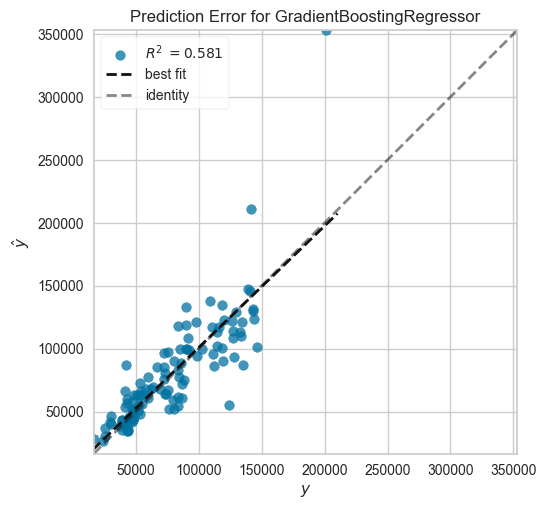

In [22]:
plot_model(tunned_model, plot='error')

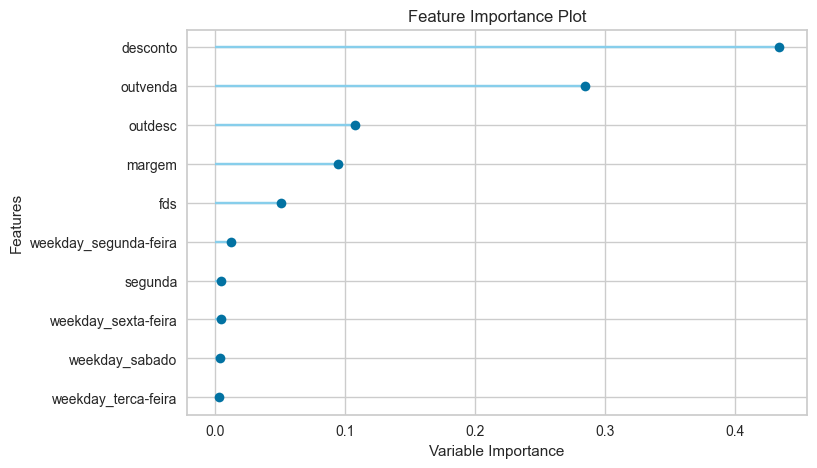

In [23]:
plot_model(tunned_model, plot='feature')

In [24]:
#Testando com dados de treinameto
p = predict_model(tunned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,14816.9054,559438932.2175,23652.4614,0.5813,0.2381,0.1918


In [28]:
#Finalizar o modelo
final_model = finalize_model(tunned_model)

In [30]:
#Previsao
prev = predict_model(final_model, data=x_teste)
prev

,desconto,margem,outmg,outdesc,outvenda,fds,segunda,weekday_domingo,weekday_quarta-feira,weekday_quinta-feira,weekday_sabado,weekday_segunda-feira,weekday_sexta-feira,weekday_terca-feira,prediction_label
date,,,,,,,,,,,,,,,
2015-08-02,3631.239990,0.437401,0,0,0,1,0,1,0,0,0,0,0,0,43240.243560
2015-08-03,3753.040039,0.416075,0,0,0,0,1,0,0,0,0,1,0,0,72120.135405
2015-08-04,2523.500000,0.385379,0,0,0,0,0,0,0,0,0,0,0,1,65469.825984
2015-08-05,5285.936035,0.389125,0,0,0,0,0,0,1,0,0,0,0,0,78248.197016
2015-08-06,4415.979980,0.371438,0,0,0,0,0,0,0,1,0,0,0,0,69301.343457
2015-08-07,3803.311035,0.418109,0,0,0,0,0,0,0,0,0,0,1,0,60282.916639
2015-08-08,1764.178101,0.372597,0,0,0,1,0,0,0,0,1,0,0,0,39113.536109
2015-08-09,1712.849976,0.415690,0,0,0,1,0,1,0,0,0,0,0,0,34874.114291
2015-08-10,4604.669434,0.422504,0,0,0,0,1,0,0,0,0,1,0,0,84118.105181
